Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [1]:
# Import libraries
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read csv file and take a look at it
train = pd.read_csv("./train.csv")
train.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Taking a look at how many rows and columns the train dataset contains
rows = train['id'].count()
columns = train.columns.nunique()
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [4]:
train.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [5]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

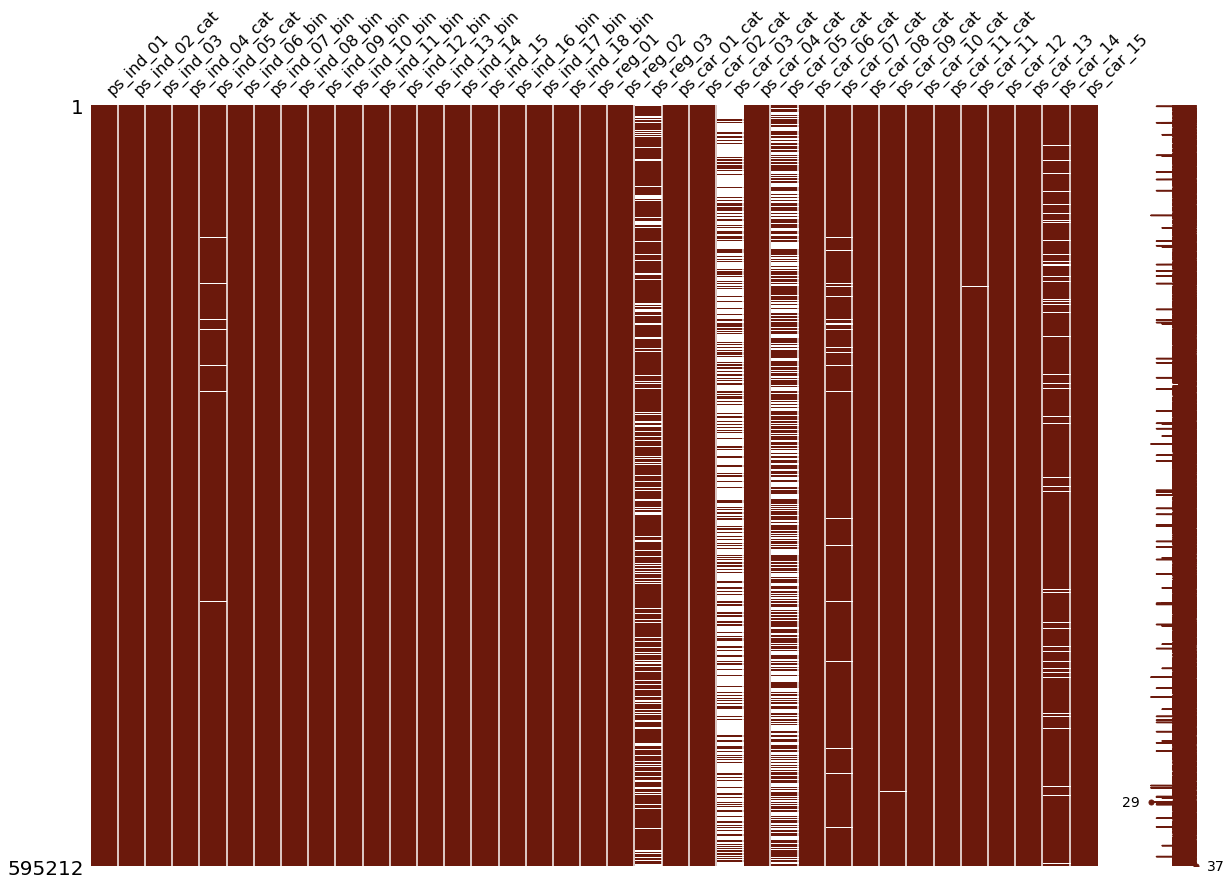

In [6]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [7]:
# List null columns name
# Hint: isnull()
# Your code here

#### Target variable inspection

<function matplotlib.pyplot.show(*args, **kw)>

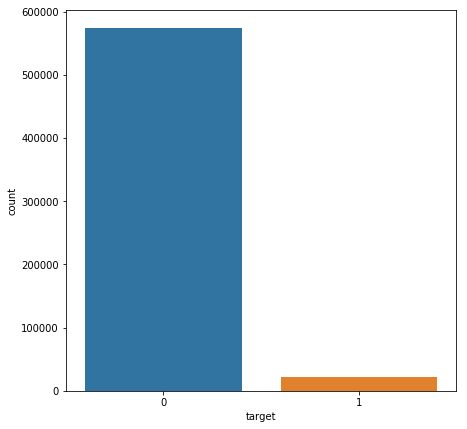

In [8]:
fig = plt.figure(figsize=(7,7))
sns.countplot(data= train, x = 'target')
plt.show

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [9]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

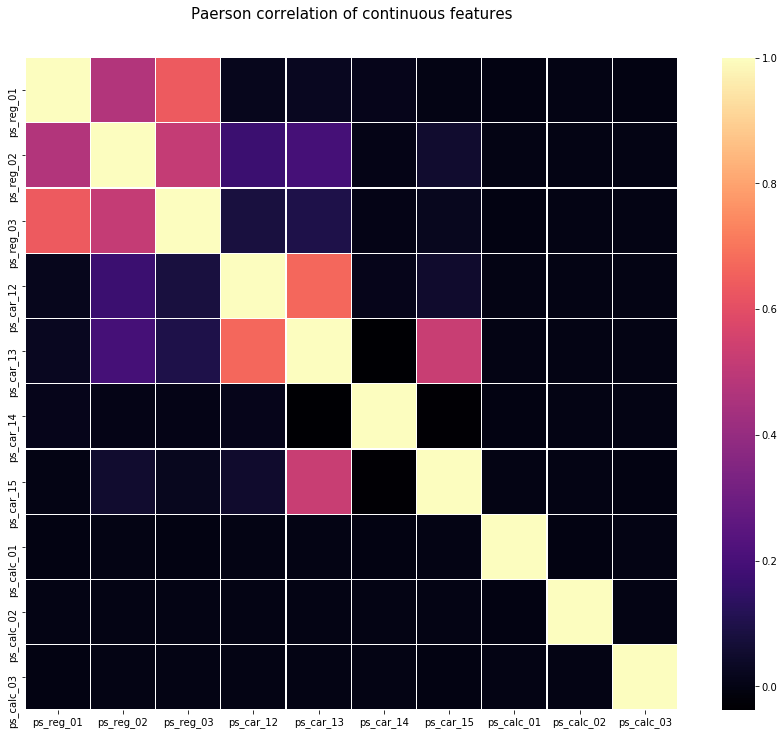

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

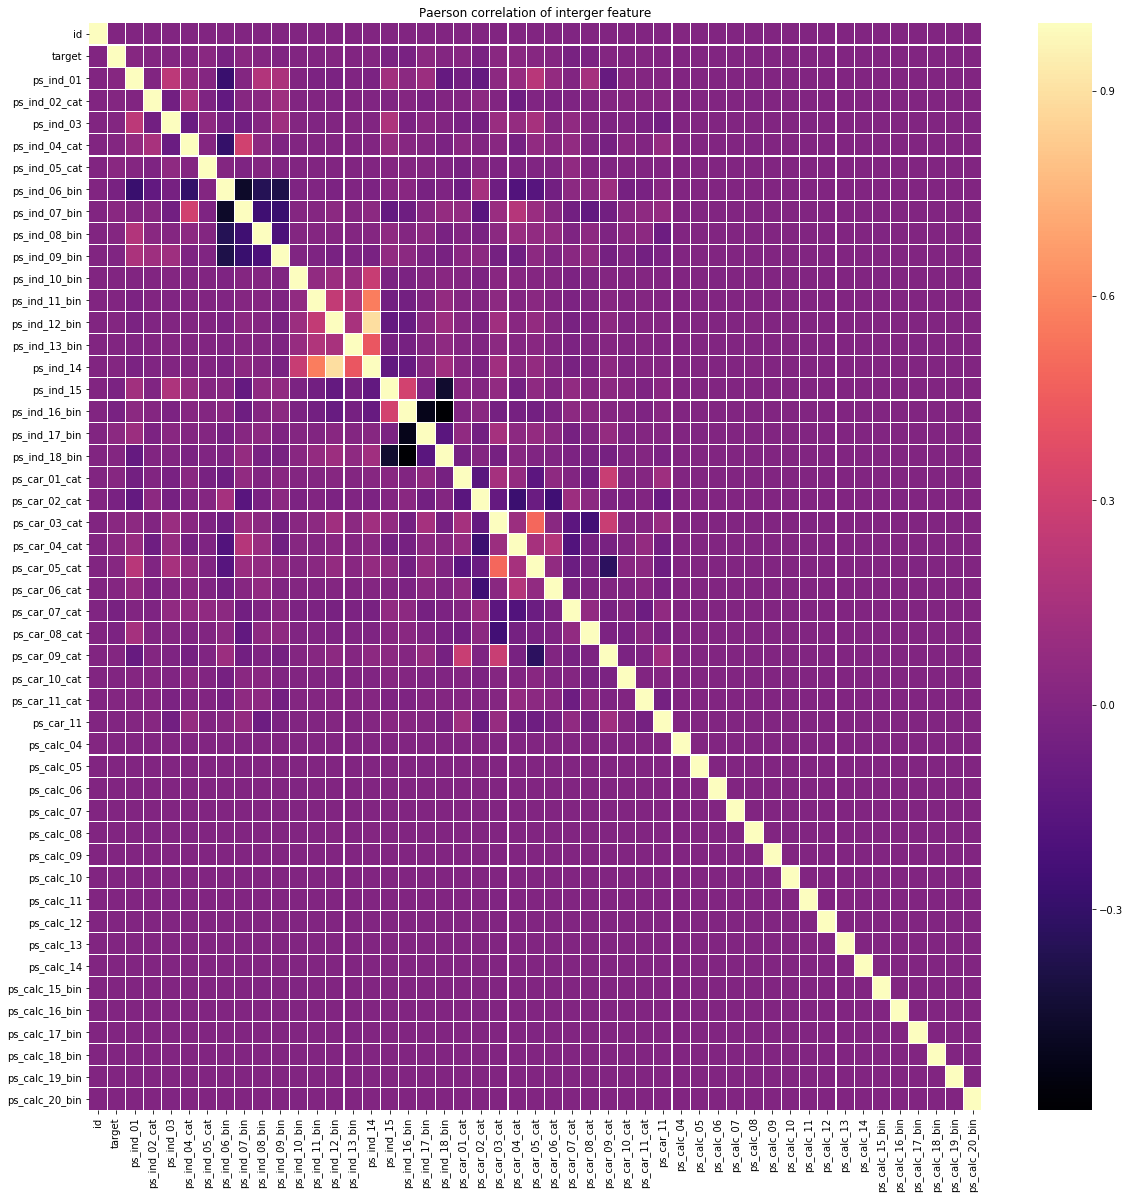

In [11]:
# Your code here
# Hint: correlation of train_int
fig = plt.figure(figsize=(20,20))
plt.title('Paerson correlation of interger feature')
sns.heatmap(train_int.corr(), linewidths=0.1 ,cmap=colormap)
plt.show()

#### Which features have negatively correlation?
Negatively correlated features :
ps_ind_07_bin vs ps_ind_06_bin
....
all black square is neagatively correlation feature

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [12]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns)) # thêm "_bin" vào cuối tên của từng cột trong data train.
bin_value_counts = train[bin_col].apply(pd.value_counts)

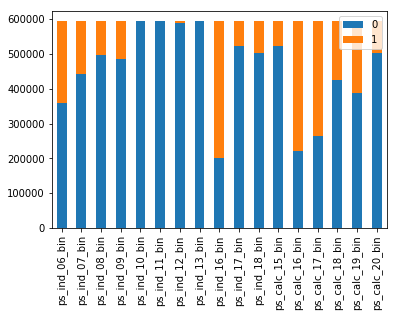

In [13]:
# hint pandas plot.bar with stacked=True
# Your code here
bin_value_counts.T.plot.bar(stacked=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [14]:
# Import train_test_split 
# Your code here
from sklearn.model_selection import train_test_split

In [16]:
# Define X (features), y (target)
X = train.drop(columns=['target', "id"])
y = train['target']

In [17]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

Check percentage

In [18]:
percentage_0 = sum(train['target']==0)*100/train['target'].count()
percentage_1 = sum(train['target']==1)*100/train['target'].count()
print("Percentage of 0:", percentage_0)
print("Percentage of 1:", percentage_1)

Percentage of 0: 96.35524821408171
Percentage of 1: 3.6447517859182947


In [19]:
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['target'].value_counts()

0    401467
1     15181
Name: target, dtype: int64

In [20]:
sample = 100000
Number_0 = int(sample*percentage_0/100)
Number_1 = int(sample*percentage_1/100)

sub_0_data = training_data[training_data['target'] == 0].head(Number_0)
sub_1_data = training_data[training_data['target'] == 1].head(Number_1)

sub_training_data = pd.concat ([sub_0_data, sub_1_data], axis = 0)
sub_training_data['target'].value_counts()

0    96355
1     3644
Name: target, dtype: int64

Percentage of 0:  0.5
Percentage of 1:  0.5
Total number:  7288


<function matplotlib.pyplot.show(*args, **kw)>

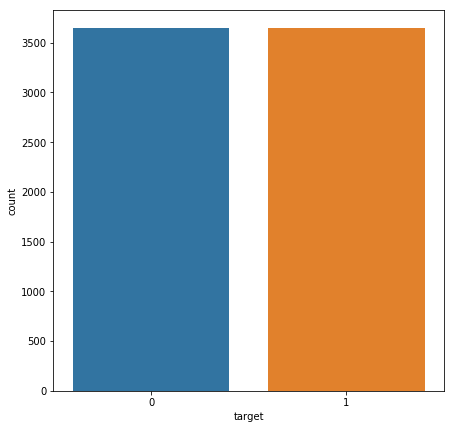

In [21]:
data_0 = sub_training_data[sub_training_data['target']==0]
data_1 = sub_training_data[sub_training_data['target']==1]
#transactions
transactions_data_0 = data_0.shape[0] #so dong cua gia tri 0
transactions_data_1 = data_1.shape[0] #so dong cua gia tri 1

undersample_0 = data_0.sample(transactions_data_1)
undersample_data = pd.concat([undersample_0,data_1], axis=0)

print("Percentage of 0: ", undersample_0.shape[0] / undersample_data.shape[0])
print("Percentage of 1: ", transactions_data_1 / undersample_data.shape[0])
print("Total number: ", undersample_data.shape[0])

X_train_under = undersample_data.drop(columns=['target', "id"])
y_train_under = undersample_data['target']

#plot countplot
plt.figure(figsize=(7,7))
sns.countplot(data=undersample_data, x='target')
plt.show

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

Total number: 192710


<function matplotlib.pyplot.show(*args, **kw)>

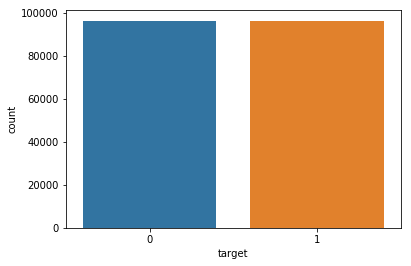

In [22]:
oversampling_1 = data_1.sample(replace=True, n= transactions_data_0)
over_sample_data = pd.concat([oversampling_1, data_0], axis=0)

X_train_over = over_sample_data.drop(columns=['target', "id"])
y_train_over = over_sample_data['target']

print('Total number:', over_sample_data.shape[0])
#plot countplot
sns.countplot(data=over_sample_data, x='target')
plt.show

## 4. Modeling

In [23]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

## 5. Evaluation Metrics

In [24]:
# Import confusion_matrix, classification_report
# Your code here
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score
# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y, description):
    prediction = estimator.predict(X)
    np.set_printoptions(precision=2)
    model_name = type(estimator).__name__
    return {'name': model_name, 
            'recall': recall_score(y, prediction),
            'precision': precision_score(y, prediction),
           'description': description}

### Evaluate with Origin dataset

In [26]:
X_train_origin = sub_training_data.drop(columns='target')
y_train_origin = sub_training_data['target']
score_origin = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train, y_train)
    score_origin.append(evaluate_model(model, X_train_origin, y_train_origin, "origin"))
    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Model: Decision Tree
Model: Random Forest
Model: Bernoulli NB
Model: Gaussian NB


### Evaluate with *Undersampled* dataset

In [27]:
Score_under = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train_under, y_train_under)
    Score_under.append(evaluate_model(model, X_test, y_test, "under"))
    print("=======================================")

Model: Logistic Regression


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: Decision Tree
Model: Random Forest
Model: Bernoulli NB
Model: Gaussian NB


### Evaluate with *Oversampled* dataset

In [28]:
Score_over = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train_over, y_train_over)
    Score_over.append(evaluate_model(model, X_test, y_test, "over"))
    print("=======================================")

Model: Logistic Regression


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: Decision Tree
Model: Random Forest
Model: Bernoulli NB
Model: Gaussian NB


In [29]:
result_over = pd.DataFrame(data = Score_over)
result_uder = pd.DataFrame(data=Score_under)
result_origin = pd.DataFrame(data=score_origin)
total_result = pd.concat([result_origin, result_over, result_uder], axis=0)
total_result

,description,name,precision,recall
0,origin,LogisticRegression,0.000000,0.000000
1,origin,DecisionTreeClassifier,1.000000,1.000000
2,origin,RandomForestClassifier,1.000000,0.751098
3,origin,GaussianNB,0.068169,0.135291
4,origin,BernoulliNB,0.100000,0.000549
0,over,LogisticRegression,0.052585,0.533241
1,over,DecisionTreeClassifier,0.044718,0.049593
2,over,RandomForestClassifier,0.000000,0.000000
3,over,GaussianNB,0.056731,0.453247
4,over,BernoulliNB,0.051873,0.531859


### Conclusion

Which model has lowest/highest accuracy?
Which model has lowest/highest recall?
Which model has lowest/highest f1?

## 6. GridsearchCV

In [ ]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit

from sklearn.model_selection import GridSearchCV
param_grid = {
#    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
gridcv=GridSearchCV(rfc, param_grid=param_grid, n_jobs=4, verbose=2)
gridcv.fit(X_train_origin, y_train_origin)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
gridcv.best_score_

#### which is the best combination of parameter

In [ ]:
gridcv.best_params_

# Done! Great Job.